In [1]:
import os
os.chdir("/home/jovyan/neurodesktop-storage/test_neurodesk")
print("Current folder:", os.getcwd())


Current folder: /neurodesktop-storage/test_neurodesk


In [2]:
import subprocess

cmd = "bash -lc 'ml fsl/6.0.7.4 && which bet2 && bet2 -h | head -n 3'"
print(subprocess.getoutput(cmd))


/neurodesktop-storage/containers/fsl_6.0.7.4_20231005/bet2

Part of FSL (ID: "")
BET (Brain Extraction Tool) v2.1 - FMRIB Analysis Group, Oxford

Usage: 
bet2 <input_fileroot> <output_fileroot> [options]

Optional arguments (You may optionally specify one or more of):
	-o,--outline	generate brain surface outline overlaid onto original image
	-m,--mask	generate binary brain mask
	-s,--skull	generate approximate skull image
	-n,--nooutput	don't generate segmented brain image output
	-f <f>		fractional intensity threshold (0->1); default=0.5; smaller values give larger brain outline estimates
	-g <g>		vertical gradient in fractional intensity threshold (-1->1); default=0; positive values give larger brain outline at bottom, smaller at top
	-r,--radius <r>	head radius (mm not voxels); initial surface sphere is set to half of this
	-w,--smooth <r>	smoothness factor; default=1; values smaller than 1 produce more detailed brain surface, values larger than one produce smoother, less detailed s

In [3]:
T1 = "./sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz"
OUT = "/home/jovyan/fsl_out"

os.makedirs(OUT, exist_ok=True)
print("T1 =", T1)
print("OUT =", OUT)


T1 = ./sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz
OUT = /home/jovyan/fsl_out


In [4]:
cmd = f"bash -lc 'ml fsl/6.0.7.4 && bet2 {T1} {OUT}/sub-01_T1w_brain.nii.gz -m -f 0.5'"
print(subprocess.getoutput(cmd))
print(" BET2 done")



 BET2 done


In [5]:
cmd = f"bash -lc 'ml fsl/6.0.7.4 && slicer {OUT}/sub-01_T1w_brain.nii.gz -a {OUT}/brain_slices.png'"
print(subprocess.getoutput(cmd))
print(" PNG slices generated")



 PNG slices generated


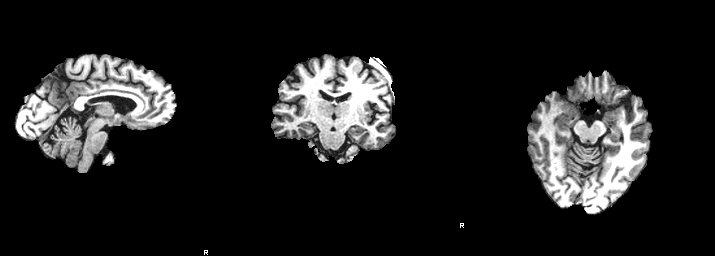

In [6]:
from IPython.display import Image, display

display(Image(filename="/home/jovyan/fsl_out/brain_slices.png"))


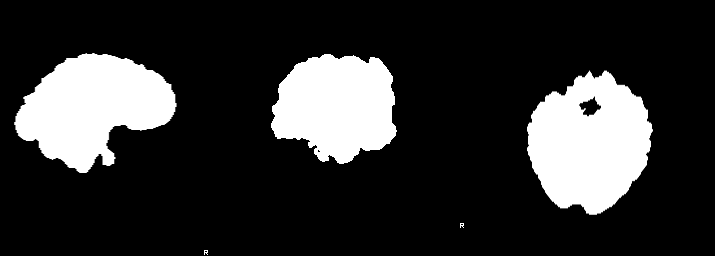

In [7]:
cmd = "bash -lc 'ml fsl/6.0.7.4 && slicer /home/jovyan/fsl_out/sub-01_T1w_brain.nii.gz_mask.nii.gz -a /home/jovyan/fsl_out/mask_slices.png'"
print(subprocess.getoutput(cmd))

from IPython.display import Image, display
display(Image(filename="/home/jovyan/fsl_out/mask_slices.png"))


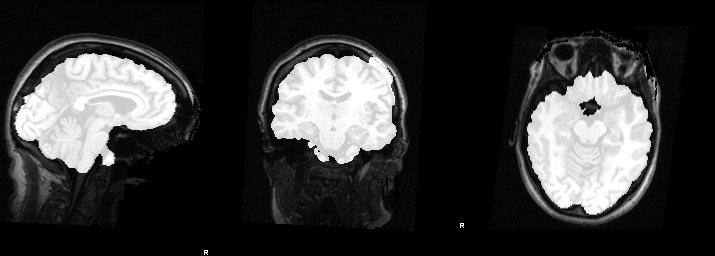

In [8]:
import subprocess
from IPython.display import Image, display

cmd = """
bash -lc '
ml fsl/6.0.7.4 &&

# Make mask bright (so it shows clearly)
fslmaths /home/jovyan/fsl_out/sub-01_T1w_brain.nii.gz_mask.nii.gz -mul 2000 /home/jovyan/fsl_out/mask_highlight.nii.gz &&

# Add mask highlight on top of original T1
fslmaths /home/jovyan/neurodesktop-storage/test_neurodesk/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz \
-add /home/jovyan/fsl_out/mask_highlight.nii.gz \
/home/jovyan/fsl_out/T1_with_mask_overlay.nii.gz &&

# Export overlay to PNG
slicer /home/jovyan/fsl_out/T1_with_mask_overlay.nii.gz -a /home/jovyan/fsl_out/T1_with_mask_overlay.png
'
"""

print(subprocess.getoutput(cmd))
display(Image(filename="/home/jovyan/fsl_out/T1_with_mask_overlay.png"))
